# Aufgabenblatt 2: Approximation von Funktionen

## Schritt 1: Installieren

In [14]:
# using Pkg
# Pkg.add(url="https://github.com/matthiasbaitsch/mmjmesh.git")

using IntervalSets
using MMJMesh.Plots
using MMJMesh.Mathematics

## Schritt 2: Funktionen approximieren

Funktionen definieren

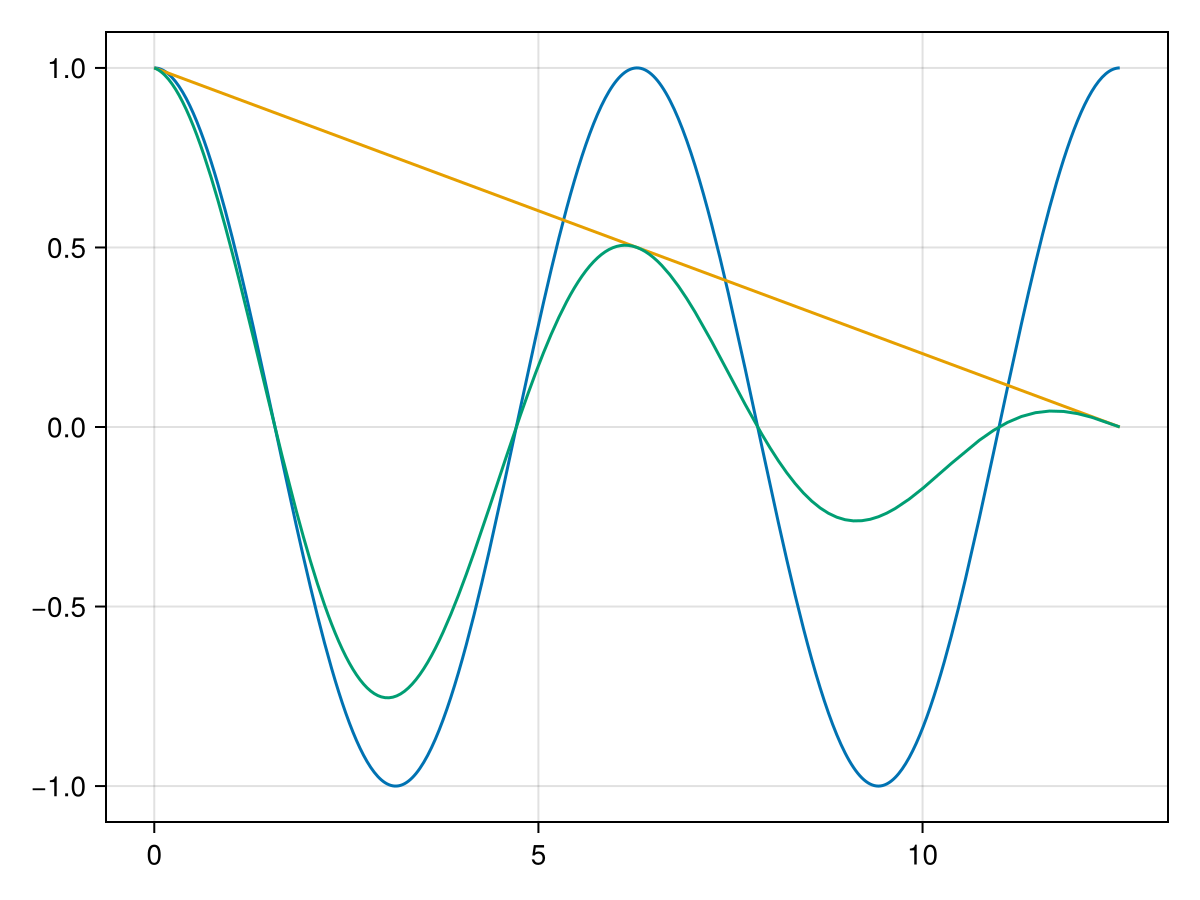

In [20]:
f = Cos(0 .. 4π)
g = Polynomial([1, -1 / (4π)], 0 .. 4π)
h = f * g

fplot(f, g, h)

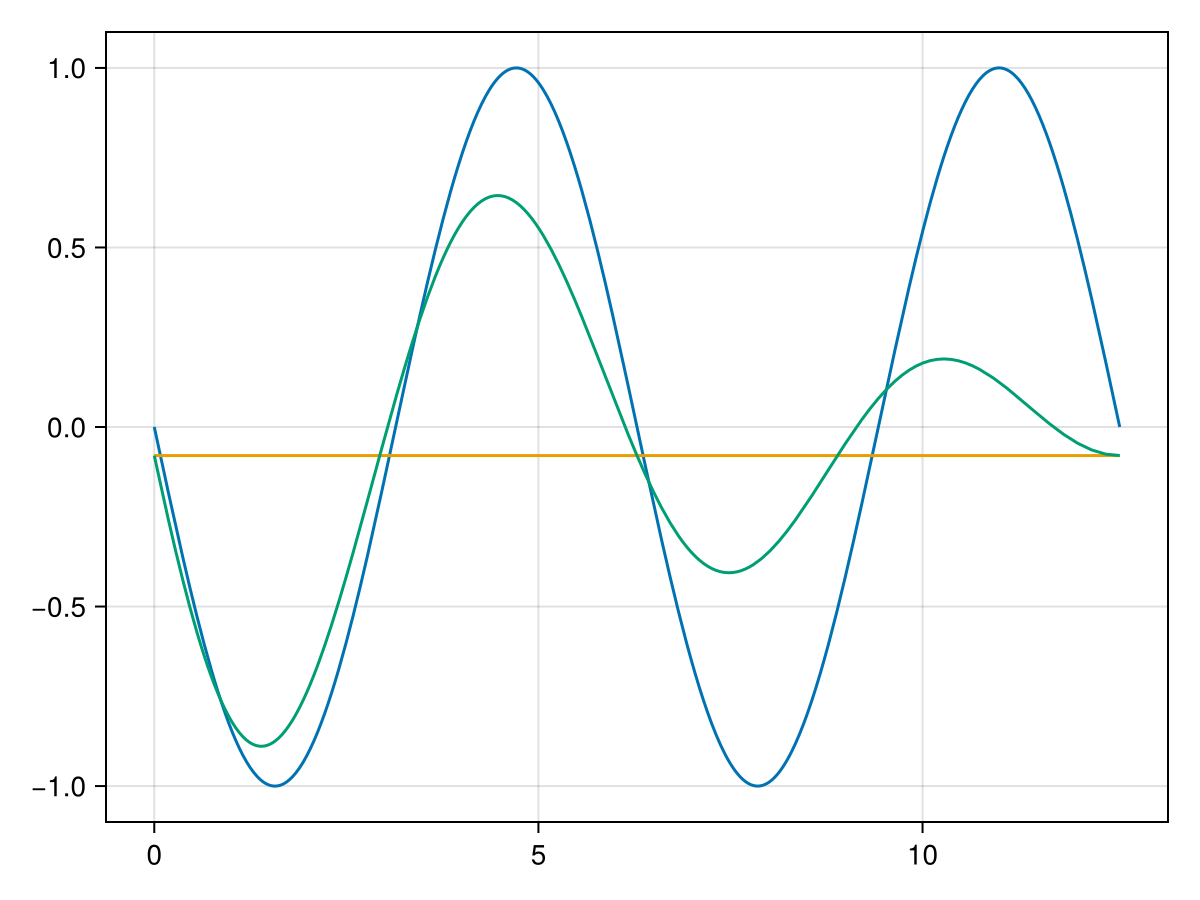

In [21]:
fplot(f', g', h')

Hutfunktionen

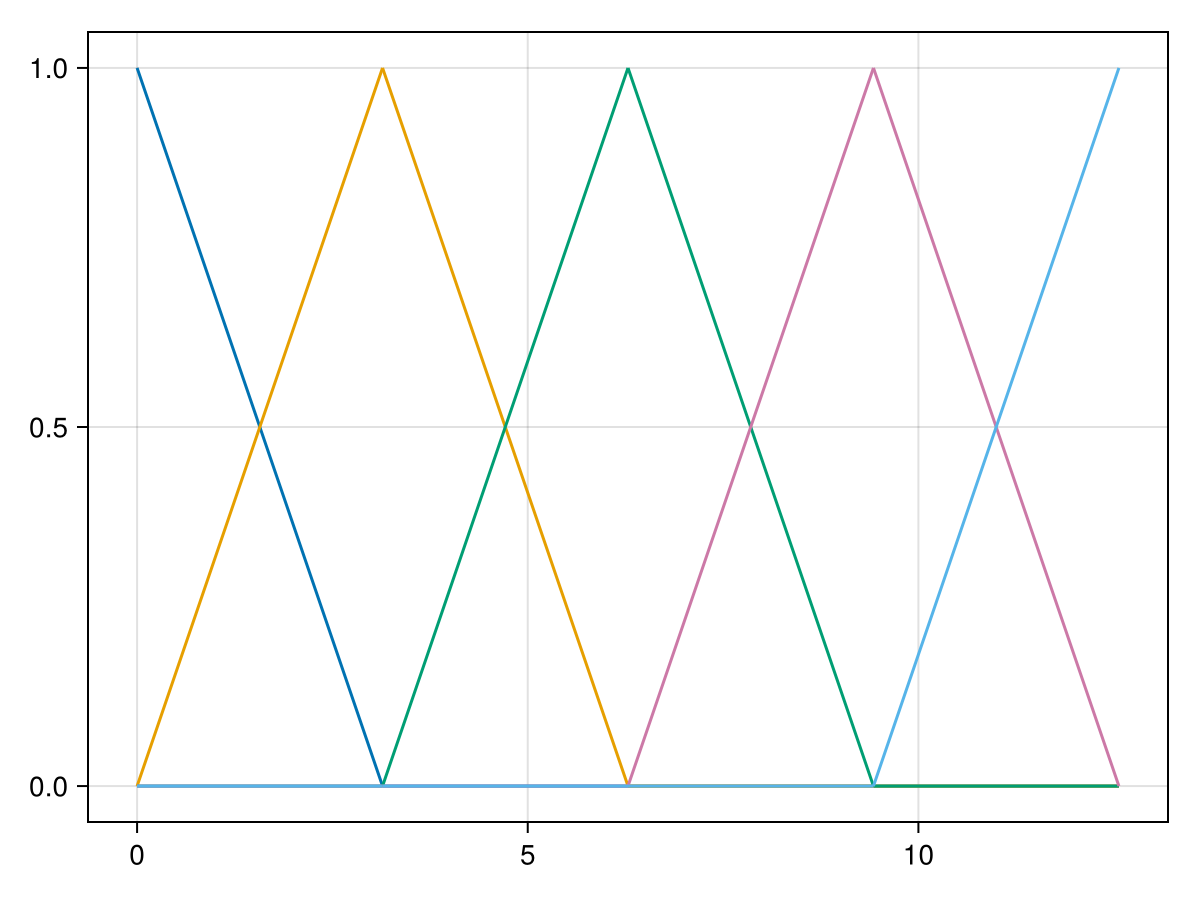

In [23]:
phis = hatfunctions(range(0, 4π, 5))

fplot(phis)

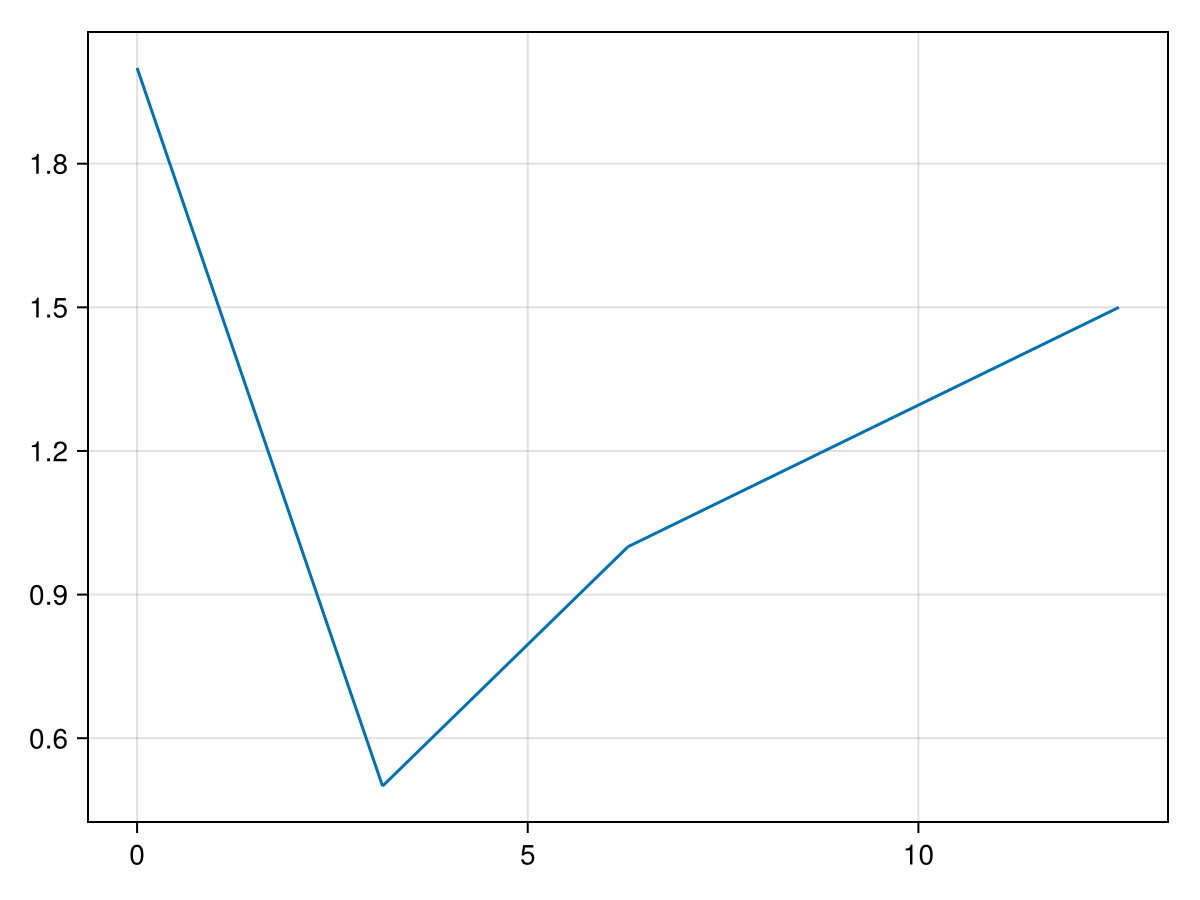

In [27]:
uHat = [2, 0.5, 1, 1.25, 1.5]

using LinearAlgebra

uu = sum(uHat .* phis)

fplot(uu)